<a href="https://colab.research.google.com/github/TadiwosAbay/image-classifier/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
import tensorflow as tf
import os

In [220]:
import cv2
import imghdr

In [221]:
data_dir = 'data' 

In [195]:
rmdir /content/data/.ipynb_checkpoints

In [222]:
os.listdir(data_dir)

['happy', 'sad']

In [223]:
os.listdir(data_dir)

['happy', 'sad']

In [224]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [ ]:
cv2.imread(os.path.join('data','happy','1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg'))

In [226]:
for image_class in os.listdir(data_dir): 
        for image in os.listdir(os.path.join(data_dir, image_class)):
                image_path = os.path.join(data_dir, image_class, image)
                try: 
                    img = cv2.imread(image_path)
                    tip = imghdr.what(image_path)
                    if tip not in image_exts: 
                        # print('Image not in ext list {}'.format(image_path))
                        os.remove(image_path)
                except Exception as e: 
                    print('Issue with image {}'.format(image_path))
                    os.remove(image_path)

In [227]:
import numpy as np
from matplotlib import pyplot as plt

In [228]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 186 files belonging to 2 classes.


In [229]:
type(data)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [230]:
scaled_iterator = data.as_numpy_iterator()

In [231]:
batch = scaled_iterator.next()

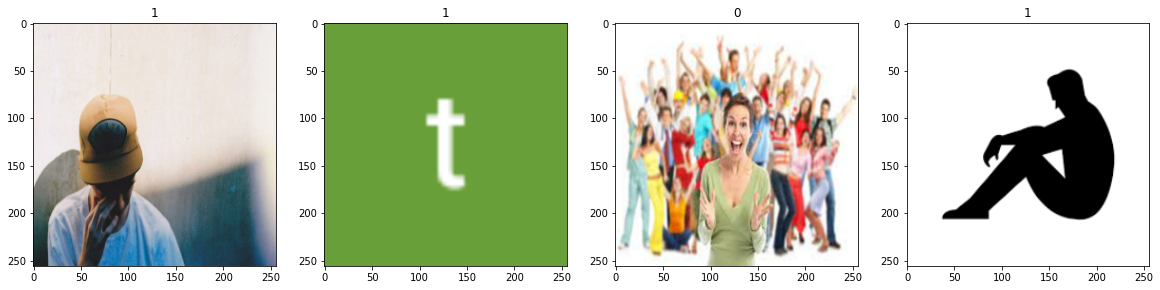

In [232]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [233]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

In [235]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [ ]:
len(data)

In [ ]:
train_size

In [238]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [239]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [240]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [241]:
model = Sequential()

In [242]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [243]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

In [245]:
logdir='logs'

In [246]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [247]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 7s 1s/step - loss: 0.8613 - accuracy: 0.6562 - val_loss: 0.7332 - val_accuracy: 0.2188
Epoch 2/20
4/4 [==============================] - 6s 1s/step - loss: 0.6970 - accuracy: 0.4141 - val_loss: 0.6642 - val_accuracy: 0.7812
Epoch 3/20
4/4 [==============================] - 6s 1s/step - loss: 0.6515 - accuracy: 0.7344 - val_loss: 0.5743 - val_accuracy: 0.7812
Epoch 4/20
4/4 [==============================] - 6s 1s/step - loss: 0.6514 - accuracy: 0.7188 - val_loss: 0.4953 - val_accuracy: 0.8438
Epoch 5/20
4/4 [==============================] - 6s 1s/step - loss: 0.5680 - accuracy: 0.7500 - val_loss: 0.5970 - val_accuracy: 0.6562
Epoch 6/20
4/4 [==============================] - 6s 1s/step - loss: 0.5049 - accuracy: 0.7734 - val_loss: 0.3133 - val_accuracy: 0.8750
Epoch 7/20
4/4 [==============================] - 6s 1s/step - loss: 0.5001 - accuracy: 0.7500 - val_loss: 0.4286 - val_accuracy: 0.7500
Epoch 8/20
4/4 [=========================

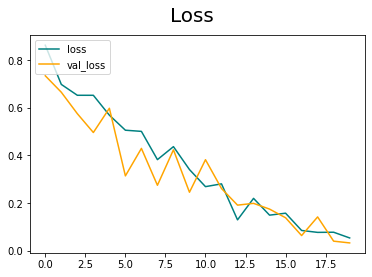

In [248]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

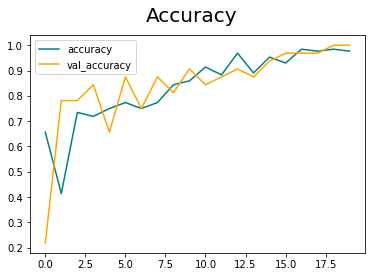

In [249]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [250]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [251]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [252]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 288ms/step


In [253]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
